
# Laboratorio-2-Series-de-Tiempo

Raul Angel Jimenez 19017

Donaldo Garcia 19683

Bryann Alfaro 19372

Oscar Saravia 19322 

link al repo: https://github.com/raulangelj/Laboratorio-2-Series-de-Tiempo

Importar librerias

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from quickda.explore_data import *
from quickda.clean_data import *
from quickda.explore_numeric import *
from quickda.explore_categoric import *
from quickda.explore_numeric_categoric import *
from quickda.explore_time_series import *
from prophet import Prophet

Analisis exploratorio

In [162]:
#Cargar dataframe y obtener primeros valores para conocimiento de datos
dataframe = pd.read_csv('datos.csv', encoding='latin-1',engine='python',header=0)

print(dataframe.head())
print(dataframe.shape)


           dt  AverageTemperature  AverageTemperatureUncertainty Country
0  1743-11-01               4.384                          2.294  Ãland
1  1743-12-01                 NaN                            NaN  Ãland
2  1744-01-01                 NaN                            NaN  Ãland
3  1744-02-01                 NaN                            NaN  Ãland
4  1744-03-01                 NaN                            NaN  Ãland
(577462, 4)


In [163]:
#Separando por mes para observar comportamiento
print(dataframe.head())
dataframe['Mes'] = dataframe['dt'].str.split('-').str[1]
dataframe.dropna(inplace=True)
dataframe_test_month = dataframe.groupby('Mes').mean()
print(dataframe_test_month.head())

           dt  AverageTemperature  AverageTemperatureUncertainty Country
0  1743-11-01               4.384                          2.294  Ãland
1  1743-12-01                 NaN                            NaN  Ãland
2  1744-01-01                 NaN                            NaN  Ãland
3  1744-02-01                 NaN                            NaN  Ãland
4  1744-03-01                 NaN                            NaN  Ãland
     AverageTemperature  AverageTemperatureUncertainty
Mes                                                   
01            11.635348                       1.213884
02            12.577014                       1.143835
03            14.574245                       1.031751
04            16.969519                       1.009302
05            19.523826                       0.946852


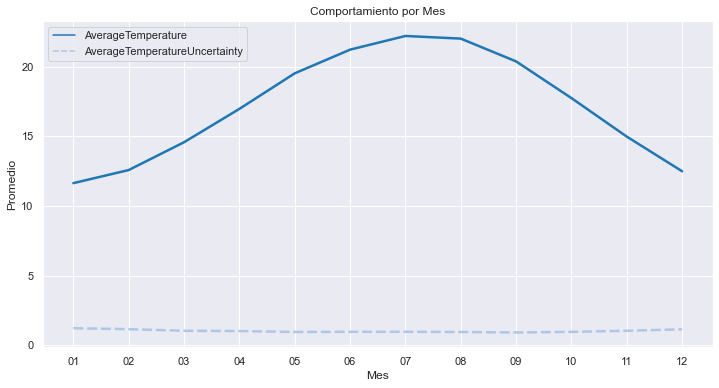

In [164]:
#Graficar comportamiento por mes
plt.figure(figsize=(12,6))
sns.lineplot(data=dataframe_test_month, palette="tab20", linewidth=2.5)
plt.title('Comportamiento por Mes')
plt.xlabel('Mes')
plt.ylabel('Promedio')
plt.show()

In [165]:
#Separando por año para observar comportamiento
print(dataframe.head())
dataframe['Año'] = dataframe['dt'].str.split('-').str[0]
dataframe.dropna(inplace=True)
dataframe_test_year = dataframe.groupby('Año').mean()
print(dataframe_test_year.head())

           dt  AverageTemperature  AverageTemperatureUncertainty Country Mes
0  1743-11-01               4.384                          2.294  Ãland  11
5  1744-04-01               1.530                          4.680  Ãland  04
6  1744-05-01               6.702                          1.789  Ãland  05
7  1744-06-01              11.609                          1.577  Ãland  06
8  1744-07-01              15.342                          1.410  Ãland  07
      AverageTemperature  AverageTemperatureUncertainty
Año                                                    
1743            5.184140                       2.183520
1744            9.837898                       2.136302
1745            1.387125                       1.960590
1750            9.129353                       2.103795
1751            9.167388                       2.053218


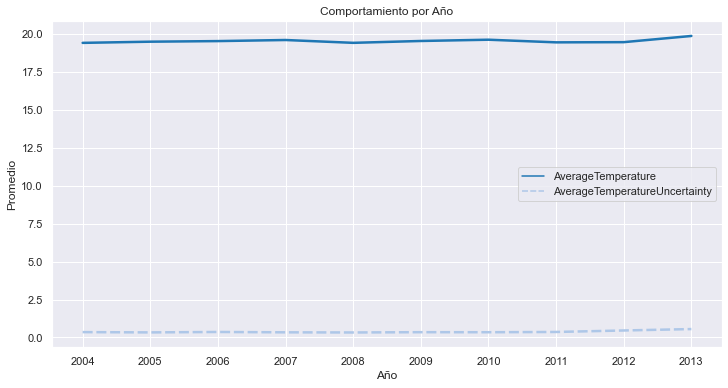

In [166]:
#Graficar comportamiento por año
plt.figure(figsize=(12,6))
data = dataframe_test_year.tail(10)
sns.lineplot(data=data, palette="tab20", linewidth=2.5)
plt.title('Comportamiento por Año')
plt.xlabel('Año')
plt.ylabel('Promedio')
plt.show()

In [167]:
df_clean = pd.DataFrame()
#Get average temperatura by date and store in dataframe
dataframe.set_index('dt', inplace=True)
dataframe.index = pd.to_datetime(dataframe.index)
df_clean = dataframe.groupby('dt').mean()
df_clean.dropna(inplace=True)
print(df_clean.head())
print(df_clean.shape)


            AverageTemperature  AverageTemperatureUncertainty
dt                                                           
1743-11-01             5.18414                        2.18352
1744-04-01             8.66148                        2.80144
1744-05-01            11.09836                        1.99444
1744-06-01            14.92772                        2.02006
1744-07-01            17.09430                        2.02156
(3167, 2)


Profiler report

In [ ]:
#Correr para generar reporte
profile = ProfileReport(df_clean)
profile

In [ ]:
#Estandarizar nombres
df_clean = clean(df_clean,method="standardize")
#Analisis de numericas 
eda_num(df_clean)

Serie Univariante

<AxesSubplot:xlabel='dt'>

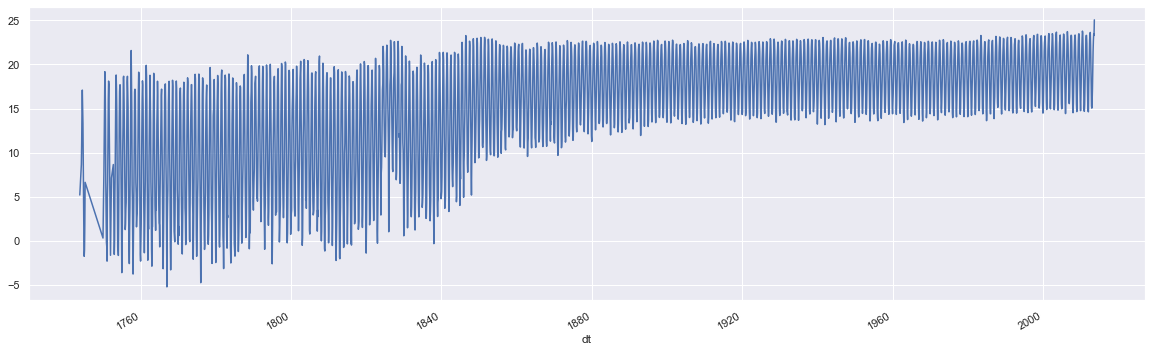

In [169]:
#Grafica completa 
df_clean['averagetemperature'].plot(figsize=(20,6))

            averagetemperature  averagetemperatureuncertainty
dt                                                           
1880-02-01           13.221928                       0.893694
1880-03-01           15.464446                       1.072905
1880-04-01           17.580547                       0.925915
1880-05-01           19.796484                       0.984502
1880-06-01           21.475518                       0.939591
            averagetemperature  averagetemperatureuncertainty
dt                                                           
2013-05-01           21.478050                       0.479277
2013-06-01           22.744508                       0.520273
2013-07-01           23.471711                       0.533153
2013-08-01           23.297855                       0.591050
2013-09-01           25.065095                       1.195619


<AxesSubplot:xlabel='dt'>

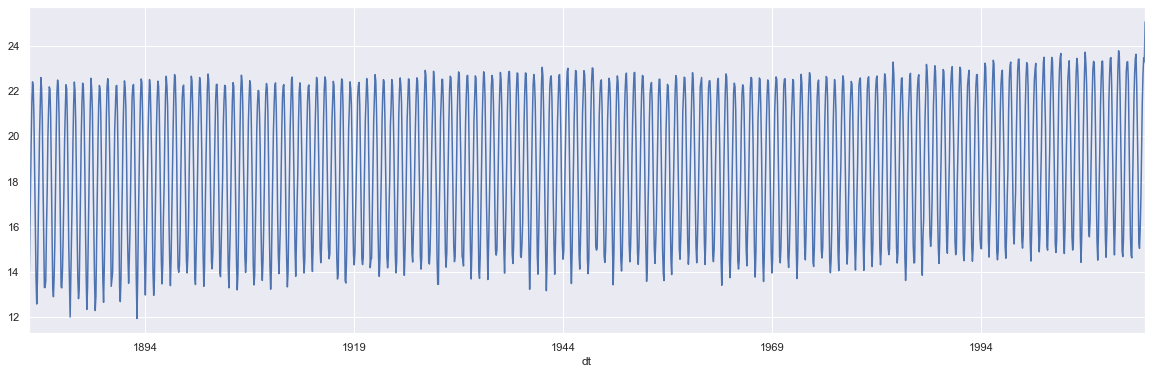

In [170]:
#Ploteando la serie para analisis posterior
import datetime
df_clean = df_clean[(df_clean.index > "1880-01-01") & (df_clean.index < "2014-01-01")]
print(df_clean.head())
print(df_clean.tail())
df_clean['averagetemperature'].plot(figsize=(20,6))

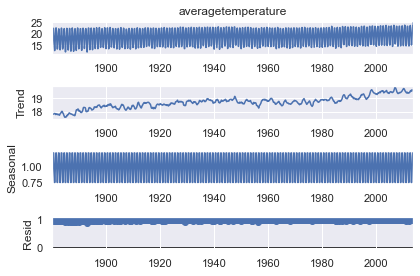

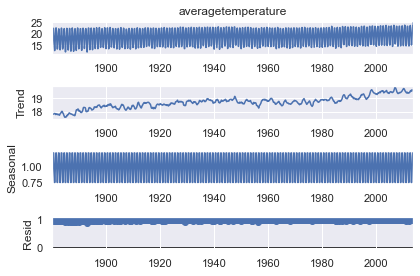

In [171]:
#Analisis de los componentes
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_clean['averagetemperature'],period=12,model='multiplicative')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

decomposition.plot()



<AxesSubplot:xlabel='dt'>

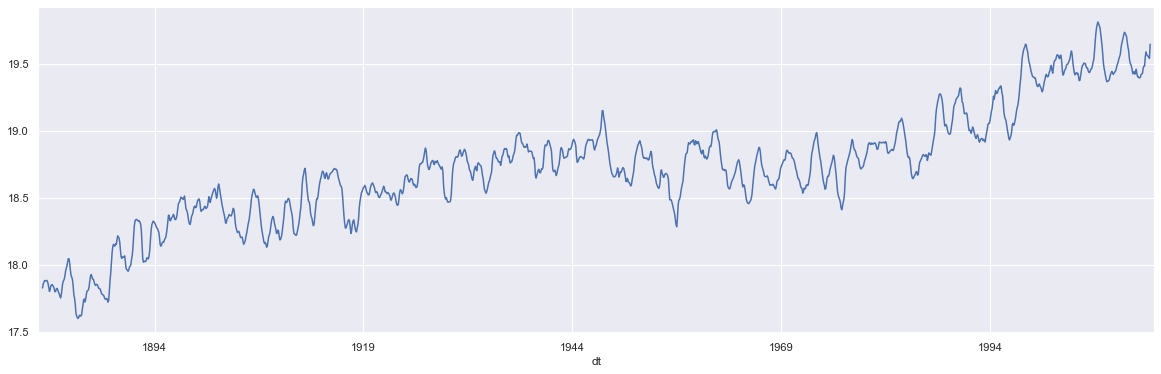

In [172]:
#Ploteando el trend
trend.plot(figsize=(20,6))

<AxesSubplot:xlabel='dt'>

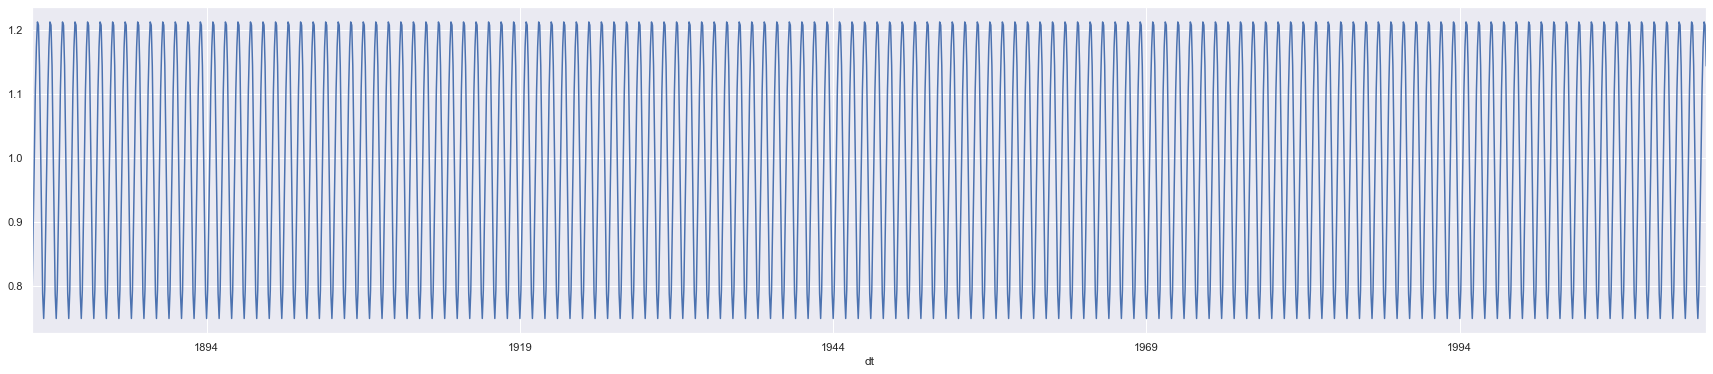

In [173]:
#Ploteando seasonal
seasonal.plot(figsize=(30,6))

<AxesSubplot:xlabel='dt'>

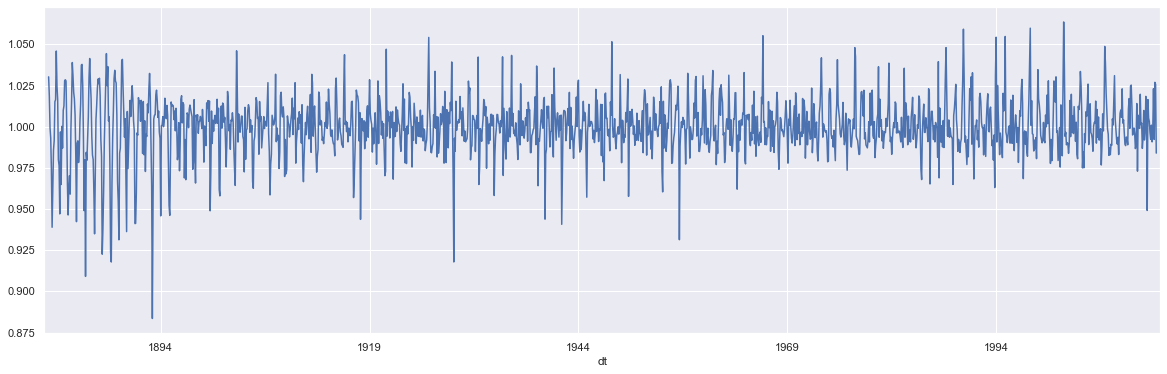

In [174]:
#Ploteando residual
residual.plot(figsize=(20,6))

In [175]:
#Test de dicky fuller
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df_clean['averagetemperature'])
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
     print("\t",key, ": ", val) 

1. ADF :  -1.15931290469924
2. P-Value :  0.6908489666911378
3. Num Of Lags :  25
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1578
5. Critical Values :
	 1% :  -3.4345008044458614
	 5% :  -2.8633733328409368
	 10% :  -2.56774603301736


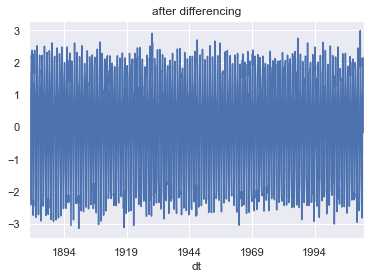

In [179]:
#Diferenciacion para reducir estacionariedad en media
data_diff = df_clean - df_clean.shift()
data_diff.dropna(inplace=True)
data_diff['averagetemperature'].plot(title='after differencing');


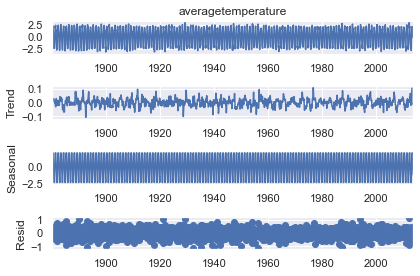

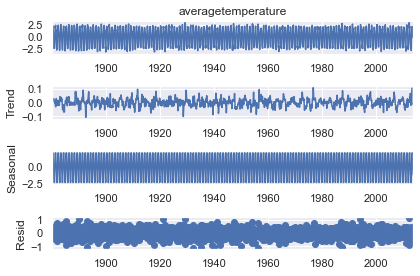

In [180]:
#Descomposicion luego del ajuste
decomposition = seasonal_decompose(data_diff['averagetemperature'],period=12,model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

decomposition.plot()

In [181]:
test = adfuller(data_diff.dropna()["averagetemperature"])
print("p-value :", test[1])

p-value : 2.362902131117043e-23
